In [4]:
"""
Stochastic Calculus

Week 3. SDE solution
"""

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import exp, log, sqrt, max, min, mean

def get_time(T=1, n=1000):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.

    Returns
    -------
    Vector of time points.
    """
    return np.linspace(start=0, stop=T, num=n+1)
    
def get_wiener_increments(T=1, n=1000, seed=None):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.
    seed : Initial seed for random number generation.
        The default is None.

    Returns
    -------
    Vector of Wiener process increments.
    """
    sd = sqrt(T/n)
    rng = np.random.default_rng(seed)
    delta_W = rng.normal(loc=0, scale=sd, size=n)
    return delta_W


def get_wiener_trajectory(T=1, n=1000, seed=None):
    """    
    Parameters
    ----------
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.
    seed : Initial seed for random number generation.
        The default is None.

    Returns
    -------
    Vector of (n+1) Wiener process values
    """
    delta_w = get_wiener_increments(T=T, seed=seed, n=n)
    w = np.zeros(n+1)
    w[1:(n+1)] = np.cumsum(delta_w)
    return w



def get_integral_trajectory(integrand_fun, T=1, n=1000, seed=None):
    """    
    Parameters
    ----------
    integrand_fun : function of w and t to integrate,
        lambda w, t : w ** 3 as example.
    T : positive float, optional
        Final moment of time. The default is 1.
    n : integer, optional
        Number of increments. The default is 1000.
    seed : Initial seed for random number generation.
        The default is None.

    Returns
    -------
    Integral trajectory.
    """

    delta_w = get_wiener_increments(T=T, seed=seed, n=n)
    w = np.zeros(n+1)
    w[1:(n+1)] = np.cumsum(delta_w)
    t = get_time(T=T, n=n)
    integrand = integrand_fun(w, t)
    
    delta_integral = integrand[0:n] * delta_w
    
    integral = np.zeros(n+1)
    integral[0] = 0
        
    integral[1:(n+1)] = np.cumsum(delta_integral)

    return integral


In [1]:
# Simulate the trajectory of r_t
# r_0 = 0.07
# dr_t = 5 * (0.05 - r_t) dt + 0.02 dW_t

In [10]:
def get_sde_solution(T=1, n=1000, r0=0.07, seed=None):
  delta_w = get_wiener_increments(T, n, seed)
  w = np.zeros(n+1)
  w[1:(n+1)] = np.cumsum(delta_w)
  t = get_time(T=T, n=n)
  dt = T / n

  r = np.zeros(n + 1)
  r[0] = r0
  for i in range(n):
    delta_r = 5 * (0.05 - r[i]) * dt + 0.02 * delta_w[i]
    r[i + 1] = r[i] + delta_r

  return r


In [11]:
T = 3 
n = 1000
t = get_time(T, n)
r = get_sde_solution(T, n, 0.07)

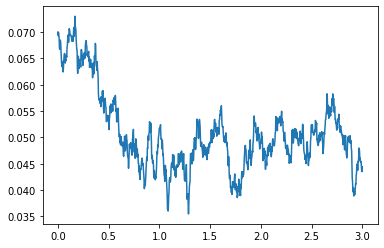

In [12]:
sns.lineplot(x=t, y=r)